#ZOMATO DATA ANALYSIS PROJECT

In [4]:
!pip install pandas numpy matplotlib seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\BHUMI GARG\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
dataframe=pd.read_csv("Zomato data .csv")

In [10]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [12]:
def handleRate(value):
    vale=str(value).split('/')
    value=value[0];
    return float(value)
dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())
    

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.0    775   
1         Spice Elephant          Yes         No   4.0    787   
2        San Churro Cafe          Yes         No   3.0    918   
3  Addhuri Udupi Bhojana           No         No   3.0     88   
4          Grand Village           No         No   3.0    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#TYPE OF RESTAURANT

In [15]:
dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


Text(0.5, 0, 'type of restaurnt')

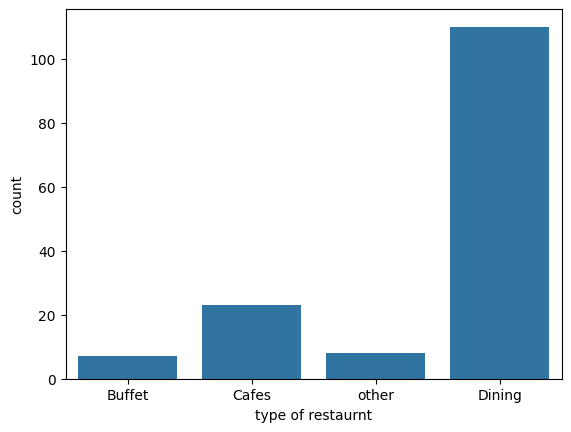

In [16]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("type of restaurnt")

conclusion-majority of restaurant falls in dining

Text(0, 0.5, 'votes')

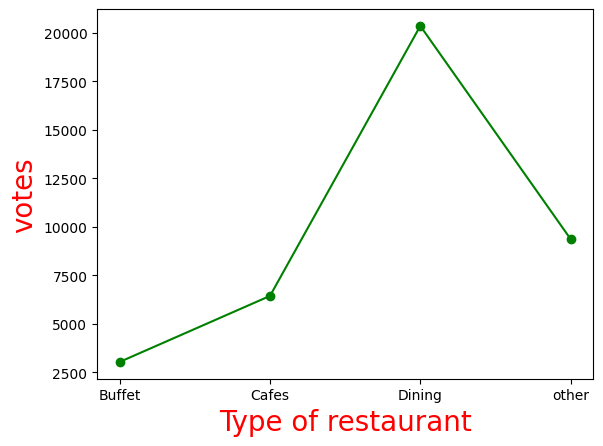

In [20]:
grouped_data=dataframe.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green",marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("votes",c="red",size=20)

conclusion- dining restraunts has recived maximum votes

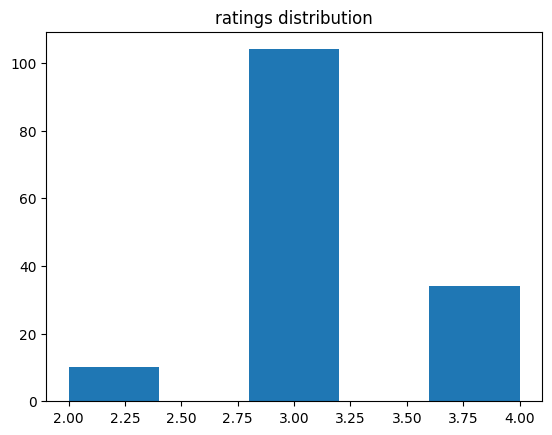

In [23]:
plt.hist(dataframe['rate'], bins =5)
plt.title("ratings distribution")
plt.show()

conclusiom- majority restarunts recievd rating from 2.75 to 3.25

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

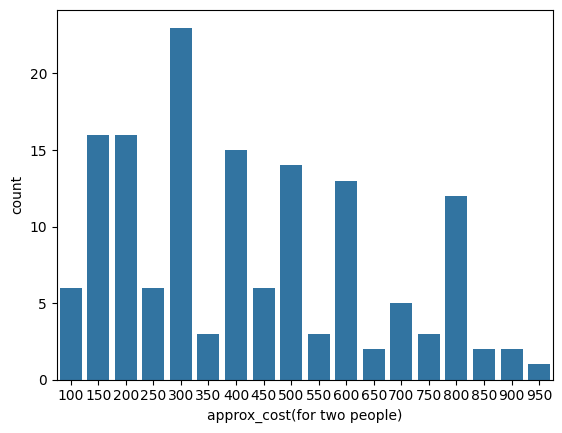

In [24]:
#Average order spending by couples
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion - majority of couples prefer restraunts with an approximate cost of 300

<Axes: xlabel='online_order', ylabel='rate'>

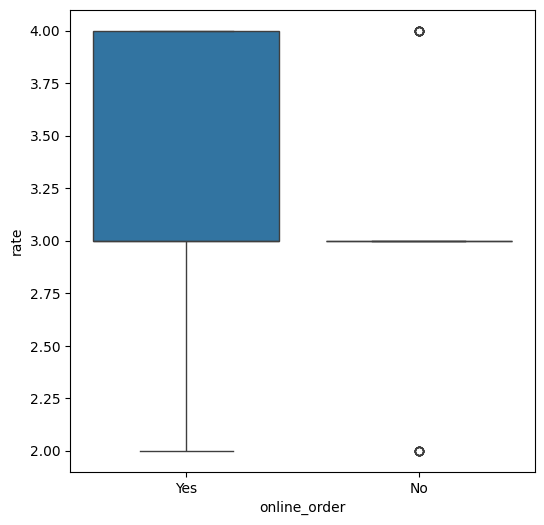

In [25]:
#which mode recieves maximum rating
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate', data=dataframe)


conclusion - offline order recieved lower rating in comparison to online order

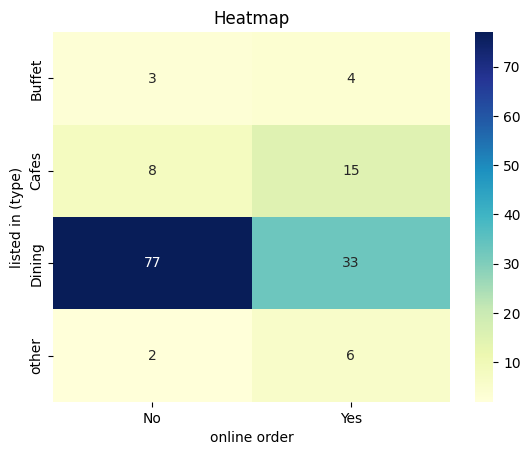

In [28]:
pivot_table=dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("listed in (type)")
plt.show()

conclusiom - dining restraunts primarily accept offline orders, whereas cafes primarily recieve onlinr orders. This suggests that clientrs prefers orders in person at restraunts , but prefer online order at cafes.